In [595]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, f_oneway, chi2_contingency

In [597]:
df = pd.read_csv('Customer Service_Requests_from_2010_to_Present.csv', low_memory=False)

In [598]:
df


Unique Key            Created Date             Closed Date Agency                      Agency Name           Complaint Type                    Descriptor        Location Type  Incident Zip          Incident Address          Street Name     Cross Street 1   Cross Street 2 Intersection Street 1 Intersection Street 2 Address Type           City Landmark Facility Type  Status                Due Date                             Resolution Description Resolution Action Updated Date Community Board      Borough  X Coordinate (State Plane)  Y Coordinate (State Plane) Park Facility Name Park Borough  School Name School Number School Region  School Code School Phone Number School Address  School City School State   School Zip School Not Found  School or Citywide Complaint  Vehicle Type  Taxi Company Borough  Taxi Pick Up Location Bridge Highway Name Bridge Highway Direction Road Ramp Bridge Highway Segment  Garage Lot Name Ferry Direction Ferry Terminal Name   Latitude  Longitude  \
0         32310363  12/31/2015 11:59:45 PM           01-01-16 0:55   NYPD  New York City Police Department  Noise - Street/Sidewalk              Loud Music/Party      Street/Sidewalk       10034.0       71 VERMILYEA AVENUE     VERMILYEA AVENUE     ACADEMY STREET  WEST 204 STREET                   NaN                   NaN      ADDRESS       NEW YORK      NaN      Precinct  Closed           01-01-16 7:59  The Police Department responded and upon arriv...                  01-01-16 0:55    12 MANHATTAN    MANHATTAN                   1005409.0                    254678.0        Unspecified    MANHATTAN  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN           NaN                   NaN                    NaN                 NaN                      NaN       NaN                    NaN              NaN             NaN                 NaN  40.865682 -73.923501   
1         32309934  12/31/2015 11:59:44 PM           01-01-16 1:26   NYPD  New York City Police Department         Blocked Driveway                     No Access      Street/Sidewalk       11105.0           27-07 23 AVENUE            23 AVENUE          27 STREET        28 STREET                   NaN                   NaN      ADDRESS        ASTORIA      NaN      Precinct  Closed           01-01-16 7:59  The Police Department responded to the complai...                  01-01-16 1:26       01 QUEENS       QUEENS                   1007766.0                    221986.0        Unspecified       QUEENS  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN           NaN                   NaN                    NaN                 NaN                      NaN       NaN                    NaN              NaN             NaN                 NaN  40.775945 -73.915094   
2         32309159  12/31/2015 11:59:29 PM           01-01-16 4:51   NYPD  New York City Police Department         Blocked Driveway                     No Access      Street/Sidewalk       10458.0     2897 VALENTINE AVENUE     VALENTINE AVENUE    EAST 198 STREET  EAST 199 STREET                   NaN                   NaN      ADDRESS          BRONX      NaN      Precinct  Closed           01-01-16 7:59  The Police Department responded and upon arriv...                  01-01-16 4:51        07 BRONX        BRONX                   1015081.0                    256380.0        Unspecified        BRONX  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN           NaN                   NaN                    NaN                 NaN                      NaN       NaN                    NaN              NaN             NaN                 NaN  40.870325 -73.888525   
3         32305098  12/3

In [606]:
# Convert 'Created Date' and 'Closed Date' with explicit format
date_format = '%m/%d/%Y %I:%M:%S %p'

df['Created Date'] = pd.to_datetime(df['Created Date'], format=date_format, errors='coerce')
df['Closed Date'] = pd.to_datetime(df['Closed Date'], format=date_format, errors='coerce')

# Create a new column for the time difference
df['Request_Closing_Time'] = df['Closed Date'] - df['Created Date']
df['Request_Closing_Time']

0                    NaT
1                    NaT
2                    NaT
3                    NaT
4                    NaT
               ...      
300693               NaT
300694   0 days 02:00:31
300695   0 days 03:07:17
300696   0 days 04:05:33
300697   0 days 04:08:49
Name: Request_Closing_Time, Length: 300698, dtype: timedelta64[ns]

In [608]:
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

df['Request_Closing_Time'] = (df['Closed Date'] - df['Created Date'])
df['Request_Closing_Time']
df['Status'] = df['Closed Date'].isna().map({True: 'Open', False: 'Closed'})
closed_requests = df[df['Request_Closing_Time'].notna()]
closed_requests['Request_Closing_Time'].describe()

count                       180172
mean     0 days 04:17:14.918250338
std      0 days 05:50:29.851797721
min                0 days 00:02:26
25%                0 days 01:16:29
50%                0 days 02:42:24
75%                0 days 05:19:21
max               24 days 16:52:22
Name: Request_Closing_Time, dtype: object

In [610]:
columns_to_drop = [
    'Agency Name', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
    'Intersection Street 1', 'Intersection Street 2', 'Address Type', 'Park Facility Name',
    'Park Borough', 'School Name', 'School Number', 'School Region', 'School Code',
    'School Phone Number', 'School Address', 'School City', 'School State', 'School Zip',
    'School Not Found', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
    'Taxi Pick Up location', 'Bridge Highway Name', 'Bridge Highway Direction',
    'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name',
    'Landmark', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Due Date',
    'Resolution Action Updated Date', 'Community Board', 'Facility Type',
    'Location'
]
columns_to_drop_existing = [col for col in columns_to_drop if col in df.columns]
df_cleaned = df.drop(columns=columns_to_drop_existing)
df_cleaned.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip', 'City', 'Status', 'Resolution Description', 'Borough', 'Taxi Pick Up Location', 'Latitude', 'Longitude', 'Request_Closing_Time'], dtype='object')

In [612]:
print('before',df_cleaned.isnull().sum())

before Unique Key                     0
Created Date              116842
Closed Date               118222
Agency                         0
Complaint Type                 0
Descriptor                  5914
Location Type                131
Incident Zip                2615
City                        2614
Status                         0
Resolution Description         0
Borough                        0
Taxi Pick Up Location     300698
Latitude                    3540
Longitude                   3540
Request_Closing_Time      120526
dtype: int64


In [614]:
print('before',df_cleaned.isnull().sum())

before Unique Key                     0
Created Date              116842
Closed Date               118222
Agency                         0
Complaint Type                 0
Descriptor                  5914
Location Type                131
Incident Zip                2615
City                        2614
Status                         0
Resolution Description         0
Borough                        0
Taxi Pick Up Location     300698
Latitude                    3540
Longitude                   3540
Request_Closing_Time      120526
dtype: int64


In [616]:
df_cleaned=df_cleaned.dropna()
print('after',df_cleaned.isnull().sum())

after Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Status                    0
Resolution Description    0
Borough                   0
Taxi Pick Up Location     0
Latitude                  0
Longitude                 0
Request_Closing_Time      0
dtype: int64


In [618]:
for col in df_cleaned.columns:
    print(f"{col}: {df_cleaned[col].unique()[:5]}") 

Unique Key: []
Created Date: <DatetimeArray>
[]
Length: 0, dtype: datetime64[ns]
Closed Date: <DatetimeArray>
[]
Length: 0, dtype: datetime64[ns]
Agency: []
Complaint Type: []
Descriptor: []
Location Type: []
Incident Zip: []
City: []
Status: []
Resolution Description: []
Borough: []
Taxi Pick Up Location: []
Latitude: []
Longitude: []
Request_Closing_Time: <TimedeltaArray>
[]
Length: 0, dtype: timedelta64[ns]


In [620]:
numeric_columns = ['Unique Key', 'Incident Zip', 'Latitude', 'Longitude']

# Force convert to numeric (in case any were object type)
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows where all numeric columns are NaN
df_cleaned = df[numeric_columns].dropna(how='all')

# Drop columns where all values are NaN
df_cleaned = df_cleaned.dropna(axis=1, how='all')

# Generate summary statistics
summary_stats = pd.DataFrame({
    'Sum': df_cleaned.sum(),
    'Mean': df_cleaned.mean(),
    'Std': df_cleaned.std(),
    'Skewness': df_cleaned.skew(),
    'Kurtosis': df_cleaned.kurtosis()
})

print(summary_stats)

                       Sum          Mean            Std  Skewness   Kurtosis
Unique Key    9.412008e+12  3.130054e+07  573854.692971  0.020283  -1.169387
Incident Zip  3.233869e+09  1.084889e+04     583.182081 -2.448212  35.992081
Latitude      1.210202e+07  4.072588e+01       0.082012  0.116736  -0.718893
Longitude    -2.196759e+07 -7.392563e+01       0.078454 -0.291343   1.441588


In [622]:
# correlation matrix
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns
correlation_matrix = df_cleaned[numerical_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
              Unique Key  Incident Zip  Latitude  Longitude
Unique Key      1.000000      0.024840 -0.032243  -0.009180
Incident Zip    0.024840      1.000000 -0.498488   0.391383
Latitude       -0.032243     -0.498488  1.000000   0.364966
Longitude      -0.009180      0.391383  0.364966   1.000000


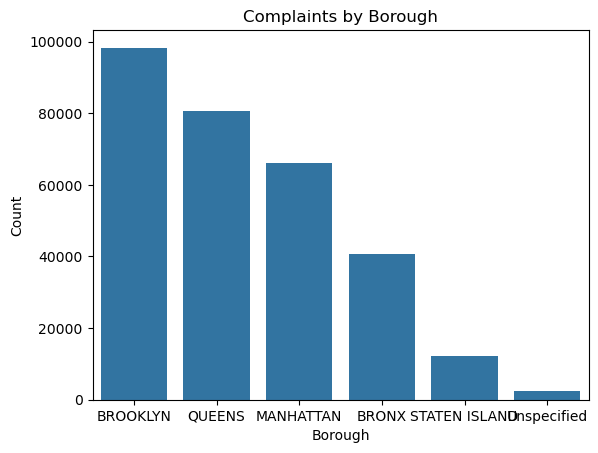

In [624]:
complaints_by_borough = df['Borough'].value_counts()

sns.barplot(x=complaints_by_borough.index, y=complaints_by_borough.values)
plt.title("Complaints by Borough")
plt.ylabel("Count")
plt.xlabel("Borough")
plt.show()

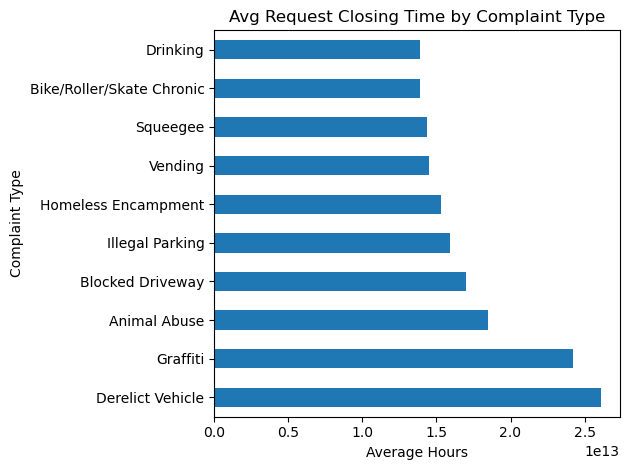

In [630]:
#  Average request closing time by complaint type
avg_closing_time = df.groupby('Complaint Type')['Request_Closing_Time'].mean().sort_values(ascending=False).head(10)

avg_closing_time.plot(kind="barh", title='Avg Request Closing Time by Complaint Type')
plt.xlabel("Average Hours")
plt.tight_layout()
plt.show()


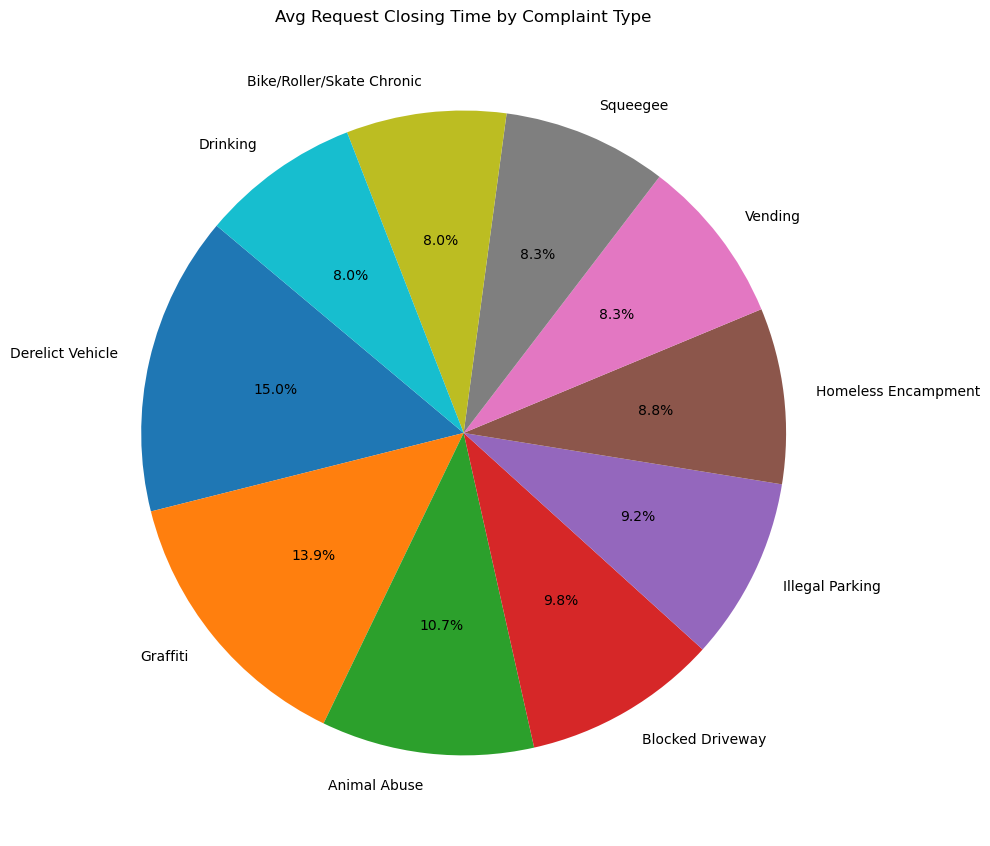

In [634]:
# Calculate the average request closing time by complaint type
avg_closing_time = df.groupby('Complaint Type')['Request_Closing_Time'].mean().sort_values(ascending=False).head(10)

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(avg_closing_time, labels=avg_closing_time.index, autopct='%1.1f%%', startangle=140)
plt.title('Avg Request Closing Time by Complaint Type')
plt.tight_layout()
plt.show()

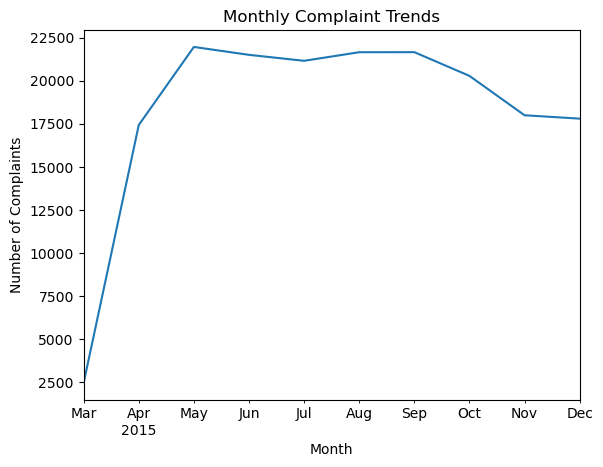

In [637]:
df['Month'] = df['Created Date'].dt.to_period('M')
monthly_complaints = df['Month'].value_counts().sort_index()
monthly_complaints.plot(kind='line')
plt.title("Monthly Complaint Trends")
plt.xlabel("Month")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.show()

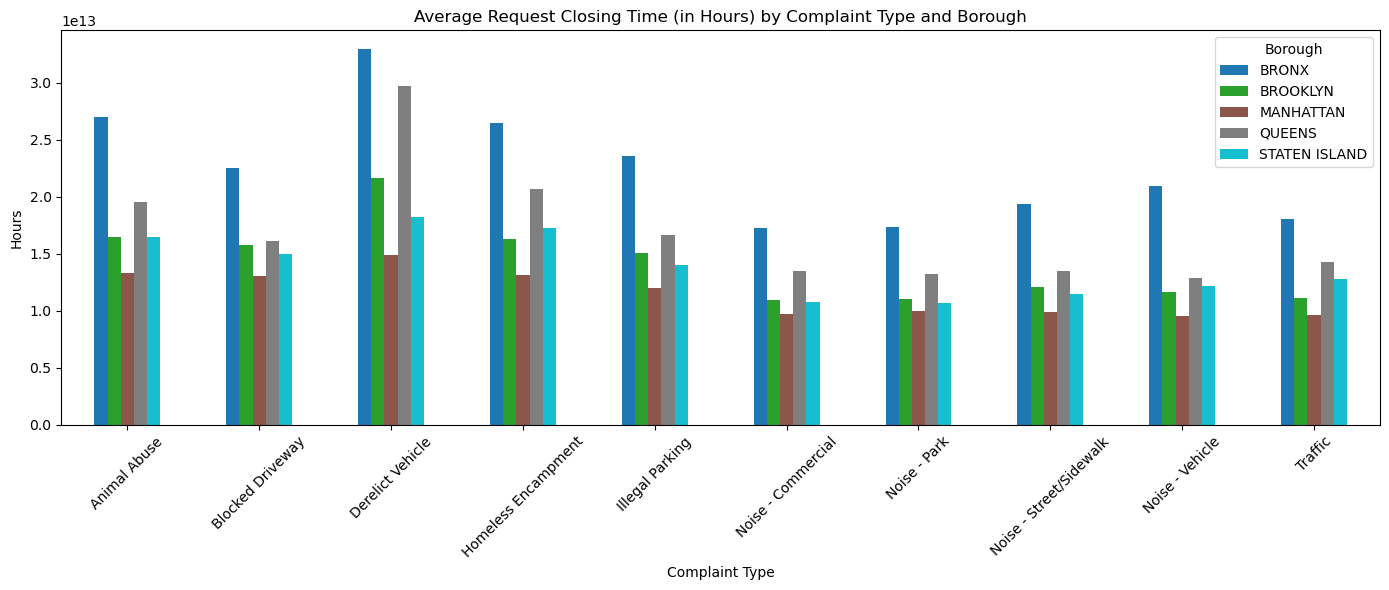

In [639]:
# Optional – keep top 10 complaint types for clarity
top_complaints = df['Complaint Type'].value_counts().head(10).index
df_top = df[df['Complaint Type'].isin(top_complaints)]

# Create pivot table
pivot_table = df_top.groupby(['Complaint Type', 'Borough'])['Request_Closing_Time'].mean().unstack()

# Handle missing values and plot
pivot_table = pivot_table.fillna(0)

# Plot
pivot_table.plot(kind='bar', figsize=(14, 6), colormap='tab10')
plt.title("Average Request Closing Time (in Hours) by Complaint Type and Borough")
plt.ylabel("Hours")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [643]:
df['Response_Hours'] = df['Request_Closing_Time'].dt.total_seconds() / 3600
df['Response_Hours']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
300693         NaN
300694    2.008611
300695    3.121389
300696    4.092500
300697    4.146944
Name: Response_Hours, Length: 300698, dtype: float64

In [649]:
test1_data = test1_data.dropna(subset=['Response_Hours'])  # Drop them
print(test1_data['Response_Hours'].isna().sum())  # Check how many missing values

0


In [655]:
print("\n" + "="*80)
print("TEST 1: DIFFERENCE IN AVERAGE RESPONSE TIME ACROSS COMPLAINT TYPES")
print("="*80)

# Create groups for ANOVA test
groups = [group['Response_Hours'].values 
          for _, group in test1_data.groupby('Complaint Type')]

# Remove any empty groups (edge case)
groups = [g for g in groups if len(g) > 0]
print(groups)


TEST 1: DIFFERENCE IN AVERAGE RESPONSE TIME ACROSS COMPLAINT TYPES
[array([1.43777778, 4.85861111, 1.79861111, ..., 1.20833333, 2.24805556,
       2.00861111]), array([10.48972222,  3.95027778,  1.36472222, ...,  2.74805556,
        1.83027778,  4.75777778]), array([7.75388889, 3.45055556, 1.89166667, ..., 8.42416667, 3.765     ,
       8.10027778]), array([0.85222222, 2.93361111, 1.26166667, ..., 3.12138889, 4.0925    ,
       4.14694444]), array([0.92083333, 2.4825    , 0.78472222, ..., 2.90277778, 2.92888889,
       3.64972222])]


In [661]:
total_size = sum(len(g) for g in groups)
if total_size < 3:
    print("Not enough data for Shapiro-Wilk test")
else:
    residuals = np.concatenate(groups) - np.mean(np.concatenate(groups))
# Use a sample for Shapiro test if dataset is too large
    if len(residuals) > 5000:
        print("Large dataset detected. Taking a random sample of 5000 residuals for Shapiro-Wilk test...")
        sample = np.random.choice(residuals, size=5000, replace=False)
        shapiro_stat, shapiro_p = stats.shapiro(sample)
    else:
        shapiro_stat, shapiro_p = stats.shapiro(residuals)

    print(f"- Normality (Shapiro-Wilk): p-value = {shapiro_p:.4f}")
    print("  → Assumption satisfied" if shapiro_p > 0.05 else "  → Warning: Non-normal residuals")


Large dataset detected. Taking a random sample of 5000 residuals for Shapiro-Wilk test...
- Normality (Shapiro-Wilk): p-value = 0.0000
  → Warning: Non-normal residuals


In [663]:
levene_stat, levene_p = stats.levene(*groups)
print(f"- Homogeneity of variance (Levene's): p-value = {levene_p:.4f}")
print("  → Assumption satisfied" if levene_p > 0.05 else "  → Warning: Unequal variances")


- Homogeneity of variance (Levene's): p-value = 0.0000
  → Warning: Unequal variances


In [665]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(*groups)

print("\nANOVA RESULTS:")
print(f"F-statistic: {f_stat:.2f}")
print(f"p-value: {p_value:.4f}")
alpha = 0.05



ANOVA RESULTS:
F-statistic: 1799.60
p-value: 0.0000



CONCLUSION: Reject H₀ (p < 0.05). Significant difference in response times exists.

POST-HOC ANALYSIS (Tukey HSD):
              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
      group1                group2         meandiff p-adj  lower   upper  reject
--------------------------------------------------------------------------------
  Blocked Driveway        Derelict Vehicle   2.6232   0.0  2.4853  2.7611   True
  Blocked Driveway         Illegal Parking  -0.2398   0.0 -0.3246 -0.1549   True
  Blocked Driveway      Noise - Commercial  -1.5938   0.0 -1.6999 -1.4876   True
  Blocked Driveway Noise - Street/Sidewalk  -1.2957   0.0 -1.3916 -1.1997   True
  Derelict Vehicle         Illegal Parking   -2.863   0.0 -3.0013 -2.7247   True
  Derelict Vehicle      Noise - Commercial   -4.217   0.0 -4.3693 -4.0647   True
  Derelict Vehicle Noise - Street/Sidewalk  -3.9189   0.0 -4.0643 -3.7735   True
   Illegal Parking      Noise - Commercial   -1.354   0.0 -1.4606 -1.2474 

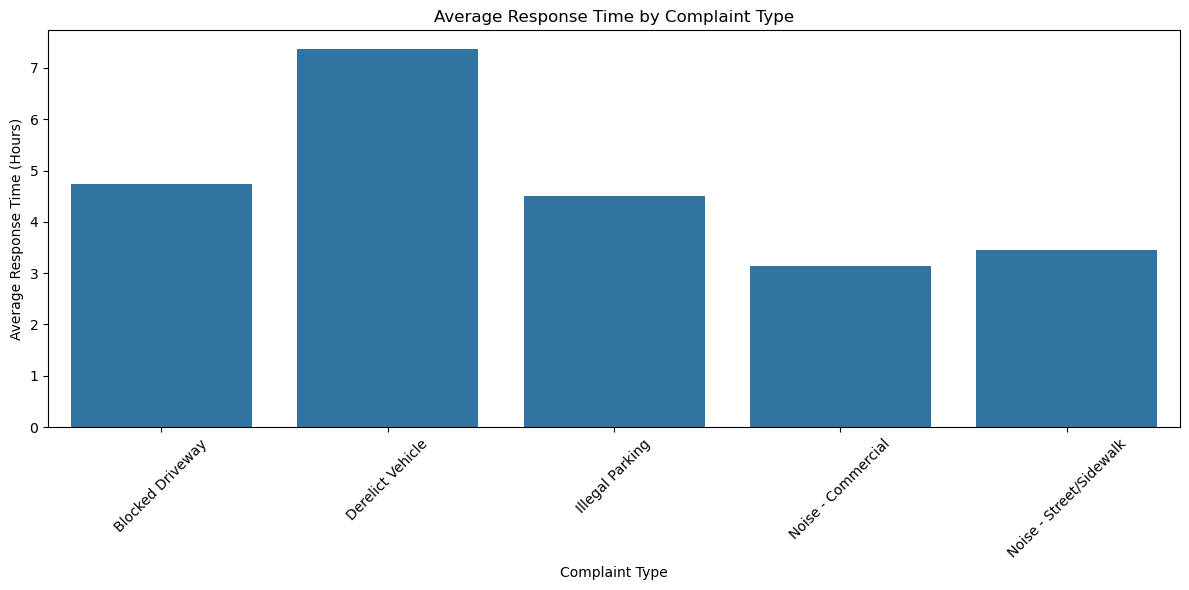

In [675]:
if p_value < alpha:
    print(f"\nCONCLUSION: Reject H₀ (p < {alpha}). Significant difference in response times exists.")
    
    # Post-hoc analysis to find where the differences are
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    print("\nPOST-HOC ANALYSIS (Tukey HSD):")
    tukey_results = pairwise_tukeyhsd(
        endog=test1_data['Response_Hours'],
        groups=test1_data['Complaint Type'],
        alpha=alpha
    )
    print(tukey_results.summary())
    avg_response = test1_data.groupby('Complaint Type')['Response_Hours'].mean().reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Complaint Type', y='Response_Hours', data=avg_response)
    plt.title('Average Response Time by Complaint Type')
    plt.ylabel('Average Response Time (Hours)')
    plt.xlabel('Complaint Type')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('average_response_time_by_complaint.png', dpi=300)
    plt.show()
else:
    print(f"\nCONCLUSION: Fail to reject H₀ (p = {p_value:.4f}). No significant difference found.")


In [679]:
# TEST 2: Association Between Complaint Type and Borough
print("\n" + "="*80)
print("TEST 2: ASSOCIATION BETWEEN COMPLAINT TYPE AND BOROUGH")
print("="*80)    


TEST 2: ASSOCIATION BETWEEN COMPLAINT TYPE AND BOROUGH


In [685]:
# Filter top complaints and boroughs
top_complaints = df['Complaint Type'].value_counts().head(5).index
top_boroughs = df['Borough'].value_counts().head(5).index
test2_data = df[
    df['Complaint Type'].isin(top_complaints) & 
    df['Borough'].isin(top_boroughs)
].copy()
# State hypotheses
print("\nHYPOTHESES:")
print("H₀: Complaint type and borough are independent (no association)")
print("H₁: Complaint type and borough are associated")



HYPOTHESES:
H₀: Complaint type and borough are independent (no association)
H₁: Complaint type and borough are associated


In [689]:

# Contingency table
contingency_table = pd.crosstab(test2_data['Complaint Type'], test2_data['Borough'])
print(contingency_table)

Borough                  BRONX  BROOKLYN  MANHATTAN  QUEENS  STATEN ISLAND
Complaint Type                                                            
Blocked Driveway         12755     28148       2073   31644           2142
Derelict Vehicle          1953      5181        537    8110           1766
Illegal Parking           7859     27462      12132   21982           4886
Noise - Commercial        2434     11463      14560    6075            679
Noise - Street/Sidewalk   8891     13355      20550    4407            820


In [691]:
# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
expected_gt_5 = (expected >= 5).mean() * 100
print(f"\nAssumption Check: {expected_gt_5:.1f}% of expected frequencies ≥ 5")
print("  → Assumption satisfied" if expected_gt_5 >= 80 else "  → Warning: Some expected frequencies < 5")


Assumption Check: 100.0% of expected frequencies ≥ 5
  → Assumption satisfied


In [693]:
# Print chi-square results
alpha = 0.05
print(f"\nChi-square statistic = {chi2:.2f}")
print(f"p-value = {p:.4f}")
print(f"Degrees of freedom = {dof}")


Chi-square statistic = 57646.25
p-value = 0.0000
Degrees of freedom = 16



Conclusion: Reject H₀. Significant association found.


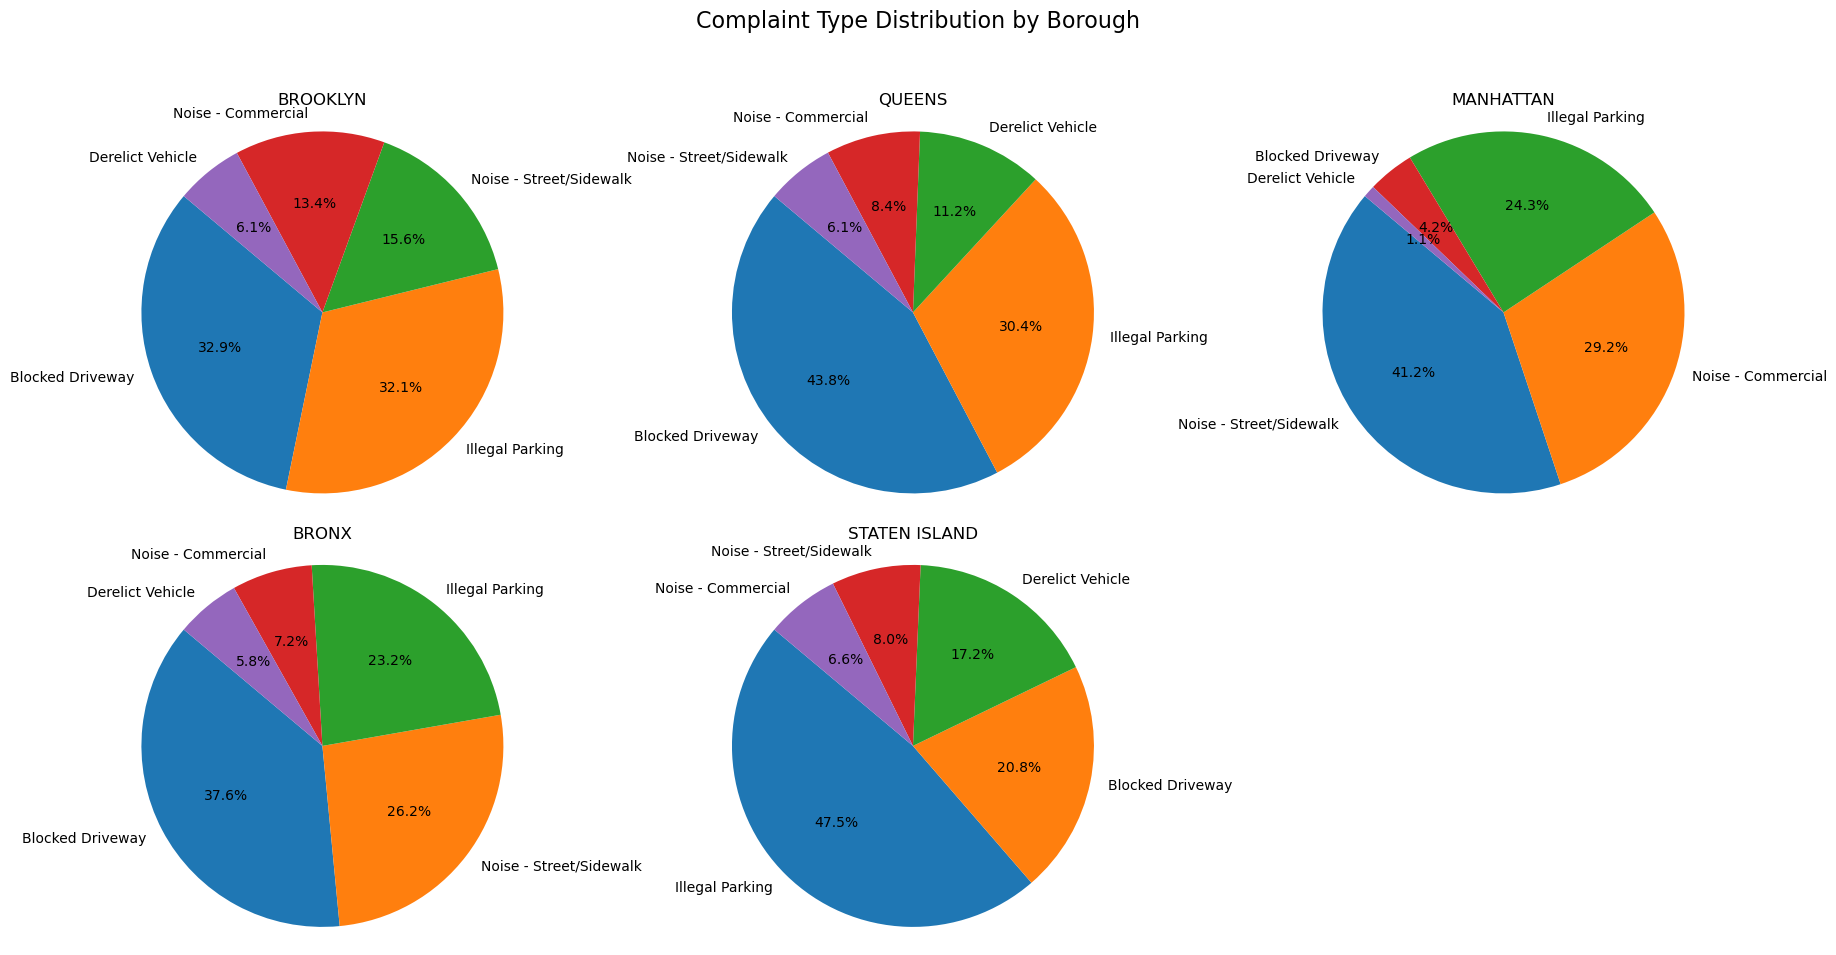

In [697]:
if p < alpha:
    print(f"\nConclusion: Reject H₀. Significant association found.")
else:
    print(f"\nConclusion: Fail to reject H₀. No significant association found.")

# Select top 5 boroughs and complaint types
top_boroughs = df['Borough'].value_counts().head(5).index
top_complaints = df['Complaint Type'].value_counts().head(5).index

# Filter test data
test2_data = df[
    df['Complaint Type'].isin(top_complaints) & 
    df['Borough'].isin(top_boroughs)
].copy()

# Layout: 2 rows, 3 columns (adjust if needed)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Adjust layout as needed
axes = axes.flatten()  # Flatten to make indexing easier

# Generate pie charts
for i, borough in enumerate(top_boroughs):
    borough_data = test2_data[test2_data['Borough'] == borough]
    complaint_counts = borough_data['Complaint Type'].value_counts()

    axes[i].pie(complaint_counts, labels=complaint_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'{borough}')
    axes[i].axis('equal')  # Equal aspect ratio makes pie circular

# Remove any extra subplot (if total boroughs < axes length)
for j in range(len(top_boroughs), len(axes)):
    fig.delaxes(axes[j])  # Remove empty subplot slots

# Overall title and layout
fig.suptitle('Complaint Type Distribution by Borough', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for suptitle
plt.savefig('complaint_distribution_all_boroughs.png', dpi=300)
plt.show()